# Outlier Detection Using AutoEncoders for Credit Card Data


* Motivation:

Detecting outliers has become one of the most significant skillset to have for data scientist. Outliers usually pinpoints data scientist towards abnormal behavior and this abnormal behavior can then be analyzed to understand what's causing it. In the following assignment I will use the library PyOd and its modules to run autoencoder models that can detect outliers.


* Resources:
        
        *Modified Dataset on Credit Card Transactions.
        *Outlier Detection Models.
        *Visualization tools to determine thresholds.
        
* Methods:
        
        *PyOd Library to run an autoencoder algorithm.
        *CrossValidate Results using Average and Maximization.
        
        
* Objective:

By using the already modified dataset on Credit Card Transaction Data identify which observations can be described as outliers and provide a brief description as to why the algorithm picked those.

In [1]:
#Loading the Libraries
import pandas as pd
import os
import numpy as np
from pyod.models.auto_encoder import AutoEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pyod.models.combination import aom, moa, average, maximization
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
#Setting up the Data
os.chdir("/Users/luislosada/Columbia Drive/Anomaly Detection/Module 7")
flag_data = pd.read_csv("flag_aggregated_dataset.csv",index_col=0).reset_index(drop=True)


In [3]:
flag_data.iloc[:,3:].describe()

,Flag_Pos_Neg_Mean,Flag_Ratio_of_Unique_Transactions_Mean,flag_amount_bin,flag_week_amount,flag_month_amount
count,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000
mean,0.001174,0.111329,0.000994,0.151595,0.067518
std,0.029430,0.299258,0.021926,0.293093,0.212029
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.160000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Splitting the Data to test out the results of the autoencoder 
X_train, X_test = train_test_split(flag_data.iloc[:,3:], test_size=0.2)


### Autoencoders

Autoencoders algorithms are unsupervised learning techniques that use neural networks to compress and encode data to later decode it and try to reconstruct it. The algorithm has 4 parts to it. The encoder where the model learns how to an encoded representation. A bottleneck which is the layer that contains the encoded representation of the input data. The decoder where the model learns how to reconstruct the data. The last part is the reconstruction loss which is the method that measures how well the encoder is performing. 
This last part is very useful for identifying outliers. If we train the data on a set of values then when get a loss value for the set. If we then test our model on new data and the loss value is above an established threshold that means that the data was not able to be reconstructed properly because and thus must be an outlier.
For this assignment we will use the Autoencoder algorithm of PyOd to determine which values are outliers. I want to limit over and under fitting the data so I'll try different combination of hidden layers and input and output layers in order to validate my results.

More on autoencoders [here]('https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726').

In [5]:
clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                150       
_________________________________________________________________
dropout_3 (Dropout)  

Epoch 50/100
28717/28717 [==============================] - 1s 46us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 51/100
28717/28717 [==============================] - 1s 45us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 52/100
28717/28717 [==============================] - 1s 46us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 53/100
28717/28717 [==============================] - 1s 45us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 54/100
28717/28717 [==============================] - 1s 45us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 55/100
28717/28717 [==============================] - 1s 45us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 56/100
28717/28717 [==============================] - 1s 45us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 57/100
28717/28717 [==============================] - 1s 46us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 58/100
28717/28717 [==============================] - 1s 47us/step - loss: 0.9925 - val_loss: 1.0673
Epoch 59/100
28717/28717 [===========

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x13b8c7400>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

In [6]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test)  # outlier labels (0 or 1)

y_test_scores = clf1.decision_function(X_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

y_test_pred.value_counts()


0    7478
1     500
dtype: int64

In [7]:
y_test_scores.describe()

count    7978.000000
mean        1.374447
std         1.905485
min         0.098963
25%         0.716627
50%         0.716627
75%         1.291131
max        44.236115
dtype: float64

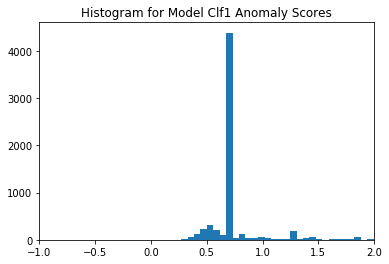

In [8]:
plt.hist(y_test_scores,bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.xlim(-1, 2)
plt.show()


We can see that most values fall between 0 and 2 and the rest of the values seem to be far off and widely spread. Lets create a threshold so that anything above 2 is flagged as an outlier.

In [9]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<2, 0, 1)
df_test['cluster'].value_counts()


1    6770
0    1208
Name: cluster, dtype: int64

In [10]:
df_test.groupby('cluster').mean()


,Flag_Pos_Neg_Mean,Flag_Ratio_of_Unique_Transactions_Mean,flag_amount_bin,flag_week_amount,flag_month_amount,score
cluster,,,,,,
0,0.000248,0.150807,0.00000,0.169179,0.067354,0.751461
1,0.001958,0.099864,0.00099,0.149697,0.064564,3.729256


We can see the huge spread between the cluster classified as normal and the cluster classified as outlier. The average score is more than 4 points off. It seems then that the cutoff point at 2 was the right choice.

Lets now test this theory by using more hidden layers and encoding-decoding the data two (clf2) and three (clf3) times.

In [11]:
clf2 = AutoEncoder(hidden_neurons = [25, 10, 2, 10, 25])
clf2.fit(X_train)
y_test_scores_2 = clf2.decision_function(X_test)  # outlier scores
y_test_scores_2 = pd.Series(y_test_scores_2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_7 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_8 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 25)                150       
_________________________________________________________________
dropout_9 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                260       
__________

28717/28717 [==============================] - 2s 53us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 56/100
28717/28717 [==============================] - 1s 52us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 57/100
28717/28717 [==============================] - 1s 52us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 58/100
28717/28717 [==============================] - 2s 53us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 59/100
28717/28717 [==============================] - 2s 52us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 60/100
28717/28717 [==============================] - 1s 52us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 61/100
28717/28717 [==============================] - 2s 52us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 62/100
28717/28717 [==============================] - 1s 51us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 63/100
28717/28717 [==============================] - 1s 51us/step - loss: 0.9803 - val_loss: 1.1775
Epoch 64/100
28717/28717 [========================

In [12]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10, 15, 25])
clf3.fit(X_train)
y_test_scores_3 = clf3.decision_function(X_test)  # outlier scores
y_test_scores_3 = pd.Series(y_test_scores_3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_14 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_15 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 25)                150       
_________________________________________________________________
dropout_16 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 15)                390       
__________

28717/28717 [==============================] - 2s 58us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 51/100
28717/28717 [==============================] - 2s 57us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 52/100
28717/28717 [==============================] - 2s 58us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 53/100
28717/28717 [==============================] - 2s 57us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 54/100
28717/28717 [==============================] - 2s 58us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 55/100
28717/28717 [==============================] - 2s 58us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 56/100
28717/28717 [==============================] - 2s 57us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 57/100
28717/28717 [==============================] - 2s 57us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 58/100
28717/28717 [==============================] - 2s 57us/step - loss: 0.9888 - val_loss: 1.1009
Epoch 59/100
28717/28717 [========================

In [13]:
#Creating a dataset to compare results.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })


Although my original data set was already normalized the scores obtained are not, and as seen in the description of the data above, there are huge outliers in the data. Lets then transform the data using a Z-score transformation.

In [14]:
train_scores_norm =  StandardScaler().fit_transform(train_scores)
test_scores_norm =  StandardScaler().fit_transform(test_scores)

#### Model Combination

A great to validate our scores is to combine the scores of three models built. There are several techniques for this but in this case, I will use two methods:

- Average: Which takes the average score of all three methods produced above and creates an aggregated score.
- Max Score: Takes the max score of all three methods and outputs that score as the score for that observation.



In [15]:
#Average using PyOd
y_by_average = average(test_scores_norm)
pd.Series(y_by_average).describe()


count    7.978000e+03
mean     1.536333e-17
std      1.000063e+00
min     -6.694319e-01
25%     -3.452413e-01
50%     -3.452413e-01
75%     -4.373359e-02
max      2.249525e+01
dtype: float64

With this average score, we take into account the results of all models built and produce a score that takes into account all three models, therefore reducing the chance of overfitting and underfitting the data.

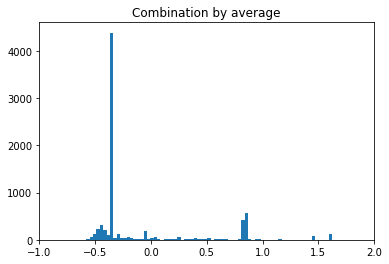

In [16]:
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.xlim(-1, 2)
plt.show()



The distribution now seems a bit a different and most values concentrate between -1 and 1. We then pick 1 as the threshold and create our clusters of outliers(1) and non outliers(0).

In [17]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<1, 0, 1)
df_test['y_by_average_cluster'].value_counts()


0    7519
1     459
Name: y_by_average_cluster, dtype: int64

In [18]:
df_test.groupby('y_by_average_cluster').mean()


,Flag_Pos_Neg_Mean,Flag_Ratio_of_Unique_Transactions_Mean,flag_amount_bin,flag_week_amount,flag_month_amount,y_by_average_score
y_by_average_cluster,,,,,,
0,0.000054,0.096670,0.000000,0.127289,0.026656,-0.142219
1,0.028655,0.286267,0.014609,0.568043,0.692897,2.329727


The mean values of the outliers and non-outliers produces again a very big spread while also reducing the outliers to about 7% of the data. Lets try now with maximization and compare results.

In [19]:
y_by_maximization = maximization(test_scores_norm)
pd.Series(y_by_maximization).describe()


count    7978.000000
mean        0.000008
std         1.000067
min        -0.669417
25%        -0.345234
50%        -0.345234
75%        -0.043724
max        22.495321
dtype: float64

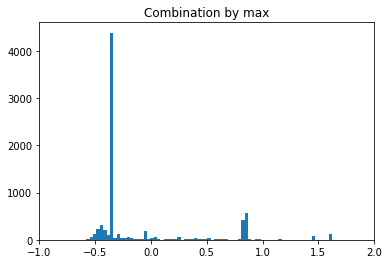

In [20]:
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.xlim(-1, 2)
plt.show()


In [21]:
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<1, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()


0    7519
1     459
Name: y_by_maximization_cluster, dtype: int64

In [22]:
df_test.groupby('y_by_maximization_cluster').mean()

,Flag_Pos_Neg_Mean,Flag_Ratio_of_Unique_Transactions_Mean,flag_amount_bin,flag_week_amount,flag_month_amount,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,
0,0.000054,0.096670,0.000000,0.127289,0.026656,-0.142219,0,-0.142211
1,0.028655,0.286267,0.014609,0.568043,0.692897,2.329727,1,2.329740


Results are almost identical. That means that the outliers detected by these three algorithms are fairly the same and thus our result does not seem to be suffering of overfitting the data.

### Capturing our Suspects

Since the average and max cluster methods seem to produce similar results, lets look at instances where observations are marked outliers in both cases.

In [23]:
suspicious = df_test[(df_test['y_by_average_cluster'] == 1) & (df_test['y_by_maximization_cluster'] == 1 )]
suspicious.head(20)

,Flag_Pos_Neg_Mean,Flag_Ratio_of_Unique_Transactions_Mean,flag_amount_bin,flag_week_amount,flag_month_amount,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster
34613,0.000000,0.000000,0.0,1.000000,1.000000,2.037696,1,2.037701,1
28858,0.000000,0.653061,0.0,0.673469,0.734694,1.390542,1,1.390554,1
38504,0.105263,0.000000,0.0,0.263158,0.052632,1.314098,1,1.314138,1
21661,0.000000,1.000000,0.0,0.000000,1.000000,2.059932,1,2.059941,1
25504,0.000000,0.000000,0.0,1.000000,1.000000,2.037696,1,2.037701,1
481,0.000000,0.000000,0.0,0.000000,1.000000,1.595170,1,1.595173,1
32164,0.000000,1.000000,0.0,1.000000,0.000000,1.459651,1,1.459665,1
19565,0.000000,0.000000,0.0,0.000000,1.000000,1.595170,1,1.595173,1
29453,0.000000,0.000000,0.0,0.000000,1.000000,1.595170,1,1.595173,1
32356,0.000000,0.000000,0.0,0.333333,1.000000,1.602249,1,1.602253,1


Now lets compare outliers to non outliers to see if our results make sense.

In [24]:
non_out = df_test[(df_test['y_by_average_cluster'] == 0) & (df_test['y_by_maximization_cluster'] == 0)]
inspect_df = pd.DataFrame({'mean_outliers':suspicious.describe().loc['mean',:],
              'mean_non_outliers':non_out.describe().loc['mean',:]})
inspect_df.drop(['y_by_average_cluster', 'y_by_maximization_cluster'],inplace=True)
inspect_df

,mean_outliers,mean_non_outliers
Flag_Pos_Neg_Mean,0.028655,0.000054
Flag_Ratio_of_Unique_Transactions_Mean,0.286267,0.096670
flag_amount_bin,0.014609,0.000000
flag_week_amount,0.568043,0.127289
flag_month_amount,0.692897,0.026656
y_by_average_score,2.329727,-0.142219
y_by_maximization_score,2.329740,-0.142211


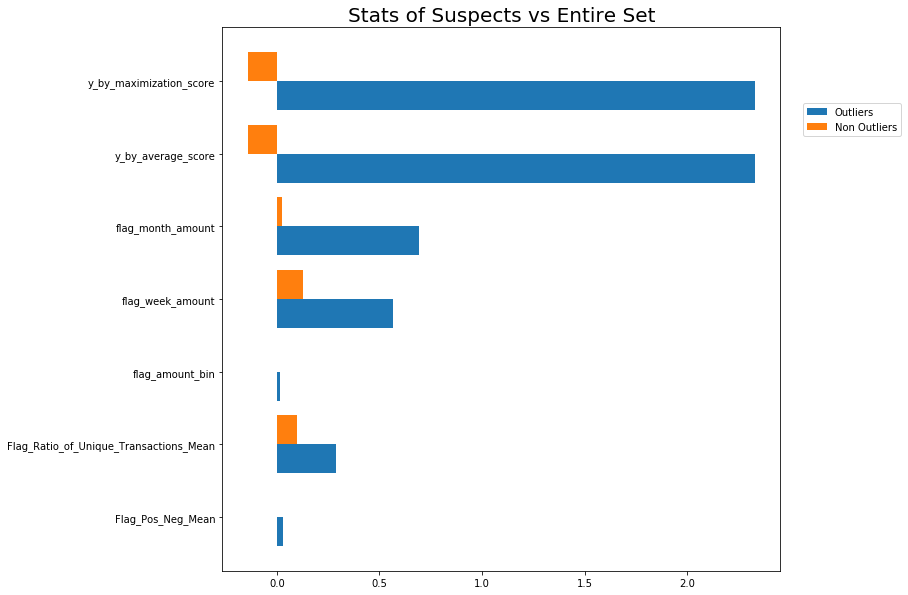

In [25]:
plt.figure(figsize=(10,10))
x = list(inspect_df.index)
_X = np.arange(len(x))
leg = ['Outliers','Non Outliers']

plt.barh(_X - 0.2, inspect_df.loc[:,'mean_outliers'], 0.4)
plt.barh(_X + 0.2, inspect_df.loc[:,'mean_non_outliers'], 0.4)
plt.yticks(_X, x) # set labels manually
plt.title('Stats of Suspects vs Entire Set',fontsize=20)
plt.legend(leg,loc=(1.04,0.8))
plt.show()


## Conclusion

The results show the huge gap between outliers and non-outliers. It is obvious then that the algorithm did its job right and was able to capture the instances of anomalies. In order to obtain a valid conclusion though, an in-depth investigation of each of these instances is needed. However, the results produced by the algorithm and the combination of methods could be used to create immediate red flags for credit card transactions.